In [1]:
import pandas as pd

In [2]:
### bicycle_out.csv 데이터파일 읽어들이기
# 변수명 : df
file_path = "./data/bicycle_out.csv"
df = pd.read_csv(file_path, encoding="euc-kr")

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    396 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    409 non-null    float64
 9   이용시간     405 non-null    float64
 10  이용거리     404 non-null    float64
 11  나이       420 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 39.5+ KB


,대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리,나이
count,420.000000,396.000000,420.000000,409.000000,405.000000,404.000000,420.000000
mean,243.254762,7.585859,93.338095,2.831296,21.269136,2679.678218,35.445238
std,301.148255,6.258985,26.270667,1.687148,20.237064,3028.272755,31.823039
min,3.000000,1.000000,3.000000,1.000000,2.000000,0.000000,21.000000
25%,104.000000,3.000000,101.000000,1.000000,7.000000,1070.000000,24.000000
50%,117.500000,6.000000,101.000000,2.000000,14.000000,1680.000000,29.000000
75%,226.500000,10.000000,101.000000,4.000000,27.000000,3757.500000,40.000000
max,3102.000000,30.000000,101.000000,7.000000,122.000000,42070.000000,533.000000


### 이상치 처리하기

In [ ]:
"""
<이상치 처리순서>
 1. 결측치 처리가 완료되어야 합니다.
 2. 중복치 처리가 완료되어야 합니다.
 3. describe()를 통해 1차적으로 이상한 데이터가 있는지 확인
    - 숫자값을 가지는 컬럼들에 대해서만 확인이 가능합니다.(문자값은 직접 확인해야함)
    - 컬럼의 성격을 상식선에 알고 있는 경우 min과 max값을 확인 합니다.
 4. 이상치 확인 방법
    - 그래프 이용하여 확인 : boxplot() 그래프로 확인
    - 이상치 계산 공식으로 확인 후 -> 이상치가 없는 데이터로 사용
 5. 확인 후 이상치가 있는 행 또는 컬럼을 삭제할지, 대체할지 결정 합니다.
    -> 대체 처리 방법은 결측치 처리와 동일 합니다.
"""

In [5]:
### 결측치 처리하기
# - 각 컬럼의 전체 평균으로 대체...
df = df.fillna(df[["대여거치대", "반납거치대", "이용시간", "이용거리"]].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    420 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    420 non-null    float64
 9   이용시간     420 non-null    float64
 10  이용거리     420 non-null    float64
 11  나이       420 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 39.5+ KB


In [6]:
### 중복데이터 확인 후 있는 경우 처리하기
# - 행단위 전체 컬럼의 값 중복이 있는 경우에는 삭제 처리
df.duplicated(keep="first").value_counts()

False    420
Name: count, dtype: int64

### 이상 데이터 처리하기

##### <이상치 확인을 위한 데이터 시각화>

In [7]:
### 시각화 라이브러리 정의
# - 파이썬에서 사용되는 기본 시각화 라이브러리
import matplotlib.pyplot as plt

# - 히트맵 라이브러리
import seaborn as sns

# - 한글처리
plt.rc("font", family="Malgun Gothic")

# - 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False

{'whiskers': [<matplotlib.lines.Line2D at 0x2419eec08e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2419eec0e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2419eec0640>],
 'medians': [<matplotlib.lines.Line2D at 0x2419eecc310>],
 'fliers': [<matplotlib.lines.Line2D at 0x2419eecc5b0>],
 'means': []}

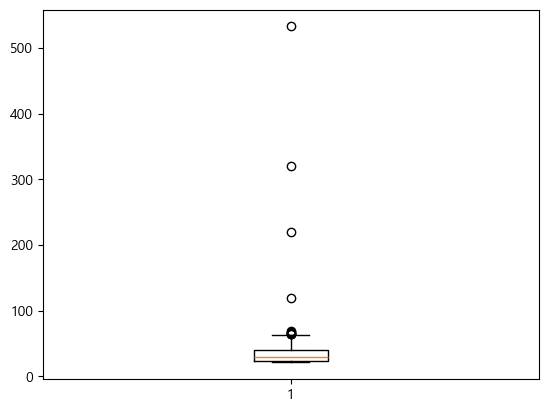

In [10]:
### 이상치 확인 그래프 : 박스플롯(boxplot)
plt.boxplot(df["나이"])

In [12]:
### 나이 데이터에서 100 이상인 데이터가 몇개 있는지 확인하기
# - 100세 이상의 데이터 갯수와, 100미만의 데이터 갯수를 확인해 주세요
(df["나이"] >= 100).value_counts()

나이
False    416
True       4
Name: count, dtype: int64

In [13]:
df[df["나이"] >= 100]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.000000,1650.0,120
30,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.000000,280.0,533
47,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.000000,1110.0,320
86,SPB-04854,2019-11-02 19:52,101,(구)합정동 주민센터,5.0,2019-11-02 21:01,101,(구)합정동 주민센터,2.0,21.269136,2300.0,220


In [14]:
### 60살 이상의 데이터 확인하기
df[df["나이"] >= 60]
(df["나이"] >= 60)

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.000000,2019-11-05 12:39,3,중랑센터,7.0,10.000000,1650.0,120
30,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.000000,2019-11-28 8:35,5,상암센터 정비실,5.0,3.000000,280.0,533
47,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.000000,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.000000,1110.0,320
86,SPB-04854,2019-11-02 19:52,101,(구)합정동 주민센터,5.000000,2019-11-02 21:01,101,(구)합정동 주민센터,2.0,21.269136,2300.0,220
93,SPB-23827,2019-11-02 23:14,113,홍대입구역 2번출구 앞,11.000000,2019-11-02 23:26,101,(구)합정동 주민센터,3.0,11.000000,1850.0,60
115,SPB-20935,2019-11-03 18:09,183,하늘채코오롱아파트 건너편,13.000000,2019-11-03 18:29,101,(구)합정동 주민센터,1.0,18.000000,2700.0,61
123,SPB-22075,2019-11-03 21:50,152,마포구민체육센터 앞,7.585859,2019-11-03 21:57,101,(구)합정동 주민센터,1.0,6.000000,970.0,69
129,SPB-22403,2019-11-03 23:45,119,서강나루 공원,10.000000,2019-11-03 23:59,101,(구)합정동 주민센터,5.0,21.269136,1530.0,62
148,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.000000,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.000000,1130.0,65
186,SPB-14919,2019-11-05 12:53,181,망원초록길 입구,6.000000,2019-11-05 13:46,101,(구)합정동 주민센터,1.0,52.000000,3780.0,60


### 이상치 계산공식

In [ ]:
"""
<계산공식>
 * min 이상치 = Q1 - (1.5 x IQR)
 * max 이상치 = Q3 + (1.5 x IQR)
 
 * IQR = Q3 - Q1
 * Q1 = 25% 시점의 분위수 값
 * Q3 = 75% 시점의 분위수 값
"""

In [17]:
df.describe()

,대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리,나이
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,243.254762,7.585859,93.338095,2.831296,21.269136,2679.678218,35.445238
std,301.148255,6.077087,26.270667,1.664855,19.871524,2969.890935,31.823039
min,3.000000,1.000000,3.000000,1.000000,2.000000,0.000000,21.000000
25%,104.000000,3.000000,101.000000,1.000000,8.000000,1070.000000,24.000000
50%,117.500000,6.000000,101.000000,2.831296,15.000000,1760.000000,29.000000
75%,226.500000,10.000000,101.000000,4.000000,27.000000,3547.500000,40.000000
max,3102.000000,30.000000,101.000000,7.000000,122.000000,42070.000000,533.000000


In [18]:
### IQR 계산하기
q1 = 24
q3 = 40
iqr = q3 - q1
iqr

16

In [19]:
### 데이터에서 25%, 50%, 75% 시점의 값 추출하기
# 넘파이 라이브러리 사용
import numpy as np

In [27]:
### 넘파이에서 사용하는 리스트의 개념은 -> array라는 용어로 사용됨
# - percentile(컬럼데이터, [구간1, 구간2, 구간...])
#   --> 반환값은 array (리스트와 같다고 보시면 됩니다.)
#   --> numpy라이브러리는 숫자값에 대한 처리를 위해 사용되는 라이브러리로,
#       array는 숫자값에 대해서만 사용됩니다.
#       (C 또는 Java 프로그램에서는 "배열"이라고 합니다.)
q1, _, q3 = np.percentile(df["나이"], [25, 50, 75])
q1, q2, q3 = np.percentile(df["나이"], [25, 50, 75])
print(q1, q2, q3)

24.0 29.0 40.0


In [28]:
### IQR 계산
iqr = q3 - q1
iqr

np.float64(16.0)

In [29]:
### min 및 max 이상치 계산하기
min_bound = q1 - (1.5 * iqr)
max_bound = q3 + (1.5 * iqr)

print(min_bound, max_bound)

0.0 64.0


In [31]:
### 이상치 추출하기
# min_bound 또는 max_bound의 값을 벗어난 데이터를 전체 컬럼 조회해 주세요.
c = (df["나이"] > max_bound) | (df["나이"] < min_bound)
df[c]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.000000,2019-11-05 12:39,3,중랑센터,7.0,10.000000,1650.0,120
30,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.000000,2019-11-28 8:35,5,상암센터 정비실,5.0,3.000000,280.0,533
47,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.000000,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.000000,1110.0,320
86,SPB-04854,2019-11-02 19:52,101,(구)합정동 주민센터,5.000000,2019-11-02 21:01,101,(구)합정동 주민센터,2.0,21.269136,2300.0,220
123,SPB-22075,2019-11-03 21:50,152,마포구민체육센터 앞,7.585859,2019-11-03 21:57,101,(구)합정동 주민센터,1.0,6.000000,970.0,69
148,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.000000,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.000000,1130.0,65
221,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.000000,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.000000,12610.0,66
294,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.000000,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.000000,1360.0,65
362,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.000000,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.000000,5600.0,65
363,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.000000,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.000000,2060.0,67


In [33]:
### 새로운 변수에 담기
df_temp = df.copy()
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    420 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    420 non-null    float64
 9   이용시간     420 non-null    float64
 10  이용거리     420 non-null    float64
 11  나이       420 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 39.5+ KB


In [37]:
### 이상치 범위에 포함된 값들을 대체하기

# - 나이 데이터 중 이상치가 아닌 값들의 평균으로 대체하기
c = (df_temp["나이"] > max_bound) | (df_temp["나이"] < min_bound)
mean_age = df_temp[c == False]["나이"].mean()
mean_age

np.float64(32.43170731707317)

In [41]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    420 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    420 non-null    float64
 9   이용시간     420 non-null    float64
 10  이용거리     420 non-null    float64
 11  나이       420 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 39.5+ KB


In [42]:
### 나이 데이터 중에 이상치인 데이터들만 추출하여
# - 평균으로 대체하기
# df_temp[c == True]["나이"] = mean_age
df_temp.loc[c==True, "나이"] = int(mean_age)

In [46]:
### 이상치가 수정되었는지 검증하기...
# - 조회 결과가 없어야 합니다. 즉, 이상치가 없어야 합니다.
c = (df_temp["나이"] > max_bound) | (df_temp["나이"] < min_bound)
df_temp[c == True]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이


### 실습
##### - <b>[관광관련 입국객 데이터]</b>(통합데이터)를 이용해서
##### - 숫자 컬럼들에 대해서 각각 결측치, 중복치, 이상치 확인 및 처리를 해주세요...
##### - 확인과 처리할 컬럼이 있는 경우 처리까지 해주세요.
##### - 이상치의 경우 시각화와 함께, min 및 max 범위를 벗어나는 데이터는 각 컬럼의 평균으로 처리

##### 다 하신 분들은 <b>[포항시 버스 교통카드 데이터]</b>에서 결측치가 있는 컬럼에 대해서
##### --> 주관적인 생각으로 대체하여 처리해 주세요...